# TensorFlow Regression Example

## Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [21]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [22]:
my_data = pd.concat([x_df, y_df], axis=1)

In [23]:
my_data.head()

,X Data,Y
0,0.00000,4.315822
1,0.00001,5.630214
2,0.00002,4.029400
3,0.00003,6.435492
4,0.00004,5.909655


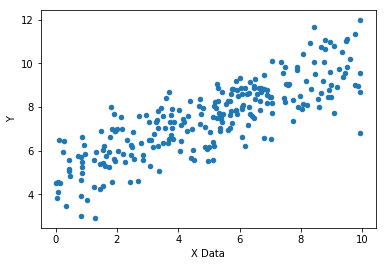

In [24]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [8]:
import tensorflow as tf

In [25]:
# Random 10 points to grab
batch_size = 8

** Variables **

In [37]:
np.random.randn(2)

array([-0.71952727, -0.74803815])

In [38]:
m = tf.Variable(-0.72)
b = tf.Variable(-0.75)

** Placeholders **

In [39]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

** Graph **

In [40]:
y_model = m*xph + b

** Loss Function **

In [41]:
error = tf.reduce_sum(tf.square(yph-y_model))

** Optimizer **

In [42]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

** Initialize Variables **

In [43]:
init = tf.global_variables_initializer()

### Session

In [44]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [45]:
model_m

0.5236197

In [46]:
model_b

4.8603854

### Results

In [47]:
y_hat = x_data * model_m + model_b

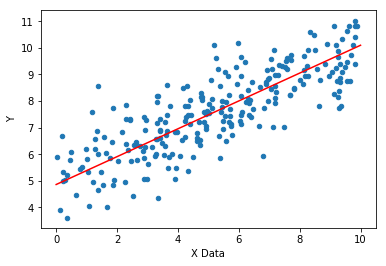

In [48]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## tf.estimator API

Much simpler API for basic tasks like regression! We'll talk about more abstractions like TF-Slim later on.

In [49]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [50]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_service': None, '_save_checkpoints_steps': None, '_device_fn': None, '_save_summary_steps': 100, '_experimental_max_worker_delay_secs': None, '_train_distribute': None, '_evaluation_master': '', '_experimental_distribute': None, '_model_dir': 'C:\\Users\\JUANCR~1\\AppData\\Local\\Temp\\tmp9dg5zqgc', '_protocol': None, '_log_step_count_steps': 100, '_task_id': 0, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_eval_distribute': None, '_session_creation_timeout_secs': 7200, '_keep_checkpoint_max': 5, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000218A03047B8>, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_is_chief': True, '_task_type': 'worker', '_master': '', '_global_id_in_cluster': 0, '_keep_checkpoint_every_n_hours': 10000}


### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [53]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [54]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},
                                                y_train,
                                                batch_size=4,
                                                num_epochs=None,
                                                shuffle=True)

In [55]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},
                                                      y_train,
                                                      batch_size=4,
                                                      num_epochs=1000,
                                                      shuffle=False)

In [56]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},
                                                     y_eval,
                                                     batch_size=4,
                                                     num_epochs=1000,
                                                     shuffle=False)

### Train the Estimator

In [57]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\JUANCR~1\A

### Evaluation

In [58]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-08T17:49:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JUANCR~1\AppData\Local\Temp\tmp9dg5zqgc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2022-02-08-17:49:46
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1394504, global_step = 1000, label/mean = 7.5052123, loss = 4.5578017, prediction/mean = 7.488505
INFO:tensorflow:Saving 'checkpoint_

In [59]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-08T17:49:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JUANCR~1\AppData\Local\Temp\tmp9dg5zqgc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2022-02-08-17:49:53
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1532757, global_step = 1000, label/mean = 7.503749, loss = 4.613103, prediction/mean = 7.447426
INFO:tensorflow:Saving 'checkpoint_pa

In [60]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.1394504, 'loss': 4.5578017, 'label/mean': 7.5052123, 'global_step': 1000, 'prediction/mean': 7.488505}
eval metrics: {'average_loss': 1.1532757, 'loss': 4.613103, 'label/mean': 7.503749, 'global_step': 1000, 'prediction/mean': 7.447426}


### Predictions

In [61]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},
                                                      shuffle=False)

In [62]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JUANCR~1\AppData\Local\Temp\tmp9dg5zqgc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3243017], dtype=float32)},
 {'predictions': array([5.0232744], dtype=float32)},
 {'predictions': array([5.722247], dtype=float32)},
 {'predictions': array([6.42122], dtype=float32)},
 {'predictions': array([7.1201925], dtype=float32)},
 {'predictions': array([7.8191643], dtype=float32)},
 {'predictions': array([8.518137], dtype=float32)},
 {'predictions': array([9.21711], dtype=float32)},
 {'predictions': array([9.916082], dtype=float32)},
 {'predictions': array([10.615055], dtype=float32)}]

In [63]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JUANCR~1\AppData\Local\Temp\tmp9dg5zqgc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [64]:
predictions

[array([4.3243017], dtype=float32),
 array([5.0232744], dtype=float32),
 array([5.722247], dtype=float32),
 array([6.42122], dtype=float32),
 array([7.1201925], dtype=float32),
 array([7.8191643], dtype=float32),
 array([8.518137], dtype=float32),
 array([9.21711], dtype=float32),
 array([9.916082], dtype=float32),
 array([10.615055], dtype=float32)]

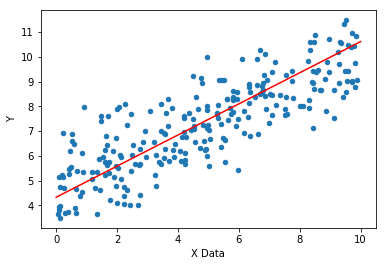

In [65]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')

# Great Job!